In [73]:
import numpy as np
from scipy import stats
import pandas as pd
import nltk

import matplotlib.pyplot as plt
# import requests
# import urllib.request
from matplotlib import rc
import seaborn as sns

%matplotlib inline
# %matplotlib nbagg
# import mpld3
# mpld3.enable_notebook()
from matplotlib.axis import Axis 
from matplotlib import interactive
interactive(True)
# %matplotlib qt

# sets the width and height of the plots in inches
plt.rcParams['figure.figsize'] = [10, 5]



from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [74]:
tripadv=pd.read_csv('tripadvisor.csv')
tripadv.columns = ['Attraction', 
                   'City', 
                   'Posted', 
                   'Visited', 
                   'User_Reviews', 
                   'User_Helpful',
                   'Review_Helpful', 
                   'Rating', 
                   'Text', 
                   'Title', 
                   'Username', 
                   'User_Location']

In [75]:
tripadv.shape

(38294, 12)

In [76]:
tripadv.sample(15)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
27453,Fenway Park,Boston,19-Jun,0,38,38,1,5,I’ve been a. Sox fan since my late Grandfather...,"Nostalgia, galore...",BozzzDad,"Vanderbilt, Pennsylvania"
21305,Museum of Fine Arts,Boston,17-Aug,17-Aug,9,3,0,5,The museum was so big that I almost lost in it...,Nice museum,Sidneyliu,Taiwan
37532,Central Park,New York City,19-Dec,19-Nov,141,73,2,5,Went twice once on a rainy Sunday morning and ...,Peaceful retreat,kpkp,"Bolton, United Kingdom"
34401,Fenway Park,Boston,19-Mar,18-Aug,16,1,0,5,"Great show. Like Bryant, Sam Hunt & John Pardi...",Great Concert.,07bahamabeach,"Boston, Massachusetts"
17937,The Getty Center,Los Angeles,19-Mar,19-Feb,14,27,1,5,The Getty is an awe -inspiring malgamoth of ga...,3 hours isn't enough!,andyb8176,"Ludlow, United Kingdom"
9273,Top of the Rock,New York City,19-Dec,19-Dec,39,17,1,5,The night we went they told us many times that...,Views,j_nicole124,"Weatherford, Texas"
10038,Griffith Observatory,Los Angeles,18-Oct,18-Aug,14,12,0,5,"Of the many ""Star"" attractions in LA, The Grif...","Near the Stars ...and learn About Them, Too",1050lynn,"Los Angeles, California"
3032,The Art Institute of Chicago,Chicago,18-Oct,18-Jul,23,21,0,5,"Visited many museums all around the world, thi...",Just Go!,leclerc,Miami
22414,Museum of Fine Arts,Boston,19-Aug,19-Aug,16,3,0,5,This August I went back to visit one of my fav...,Frequent Visits,Ninar123,NaN
5846,The Metropolitan Museum of Art,New York City,20-Jan,20-Jan,403,101,1,5,We really enjoyed The Met. Having seen most of...,Wonderful,MBFNCNative,"Cary, North Carolina"


In [77]:
# Split up the location column to grab all possible parts of the location

tripadv_loc = tripadv['User_Location'].str.split(', ', expand = True)
tripadv_loc.columns = ['User_Loc1', 'User_Loc2', 'User_Loc3', 'User_Loc4', 'User_Loc5']
tripadv = tripadv.drop(labels='User_Location', axis=1)
tripadv = pd.concat([tripadv, tripadv_loc], axis = 1)
tripadv[['User_Loc1',
         'User_Loc2',
         'User_Loc3',
         'User_Loc4',
         'User_Loc5']] = tripadv[['User_Loc1',
                                  'User_Loc2',
                                  'User_Loc3',
                                  'User_Loc4',
                                  'User_Loc5']].fillna(value='')
tripadv = tripadv.sort_values(['City', 'Attraction'])
tripadv.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
33209,Cloud Gate,Chicago,19-Jan,18-Aug,25,7,0,4,A little over crowed in August- but to be expe...,Just as expected- pretty cool,kalua80,Sudbury,Canada,,,
26949,Fenway Park,Boston,18-Nov,18-Nov,69,20,0,4,We were in awe to walk the halls of this histo...,Historic Ball Park,"St Louis, MO",O'Fallon,Missouri,,,
13338,Universal Studios Hollywood,Los Angeles,19-Dec,19-Nov,55,39,1,5,I took my 10 year-old daughter here and we had...,Fun Place for Adults and Kids,Durbanguy,San Francisco,California,,,
2829,The Art Institute of Chicago,Chicago,19-Jan,18-Dec,25,4,0,2,Visited Dec 30th using Chicago Travel pass Pro...,"great displays and exhibitions, terrible manne...",Eddy C,Toronto,Canada,,,
34783,The Metropolitan Museum of Art,New York City,20-Mar,20-Feb,139,15,0,5,Plan your tour before you start...there are fr...,Do not miss the atriums,njoireading247,Johns Creek,Georgia,,,
18261,The Getty Center,Los Angeles,19-Jul,19-Jul,597,112,0,5,"Been here many times, and will come back many ...",An excellent visit every time!,BK122,San Diego,California,,,
8257,Top of the Rock,New York City,19-Aug,19-Aug,32,30,1,4,Views are very good on a clear day. Chrysler b...,Pretty good,Klemmer182,Southampton,United Kingdom,,,
7279,Empire State Building,New York City,20-Feb,20-Feb,7,1,0,4,Very good stay with perfect Views on two level...,Perfect Views over NYC,Wolfgang L,Tapfheim,,,,
13409,Universal Studios Hollywood,Los Angeles,19-Dec,19-Dec,3,0,0,4,The only way to do Universal. Was definitely t...,Universal Express Pass,Aaron R,,,,,
12573,Universal Studios Hollywood,Los Angeles,19-Jul,19-Jul,1,0,0,3,"From previous experiences, would you say the d...",5th of July or 7th?,Fred,Nacka,Sweden,,,


In [78]:
# creating a separate dataframes for each city

# ta_bos = tripadv.loc[tripadv.City=='Boston',:]
# ta_ord = tripadv.loc[tripadv.City=='Chicago',:]
# ta_lax = tripadv.loc[tripadv.City=='Los Angeles',:]
# ta_jfk = tripadv.loc[tripadv.City=='New York City',:]

## Rating Stats

In [79]:
# Simple stats on whether reviews for each city were marked helpful

tripadv.groupby('City').agg(['sum', 'min', 'max', 'mean', 'std'])['Rating']

,sum,min,max,mean,std
City,,,,,
Boston,46885,1,5,4.695543,0.630302
Chicago,46679,1,5,4.675381,0.668019
Los Angeles,41392,1,5,4.578255,0.792727
New York City,43721,1,5,4.709285,0.698435


In [80]:
# Simple stats on whether reviews for Boston were marked helpful

tripadv[tripadv['City']=='Boston'].groupby('Attraction').agg(['sum', 'min', 'max', 'mean', 'std'])['Rating']

,sum,min,max,mean,std
Attraction,,,,,
Boston Tea Party Ships & Museum,9096,1,5,4.570854,0.744178
Fenway Park,9372,1,5,4.686000,0.711096
Freedom Trail,9398,1,5,4.699000,0.599649
Museum of Fine Arts,9557,1,5,4.790476,0.518668
North End,9462,1,5,4.731000,0.523236


- Below are ratings comparisons between attractions
- The comparisons are between reviews giving 5 stars to the attraction and reviews giving anything less than 4 stars

In [81]:
# change the ratings 1, 2, 3 to 'poor' since there are so few of them

ta_chng_rat = tripadv.replace({'Rating': [1, 2, 3]}, 'Poor')
ta_chng_rat.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
26479,Fenway Park,Boston,18-Aug,18-Aug,12,4,0,5,Fenway is an icon for baseball fans. Visiting ...,Great Red Sox win; exciting game with homers o...,gobproperty,San Francisco,California,,,
31588,Museum of Science and Industry,Chicago,19-Nov,19-Nov,1,0,0,5,My family and I are speechless. The Museum of ...,19-Nov,Ran F,,,,,
35808,The National 9/11 Memorial & Museum,New York City,19-Dec,19-Dec,5,3,1,5,Best museum I've ever visited. Heart gripping....,911 museum,coachkim3,,,,,
24983,North End,Boston,17-May,17-May,148,35,0,5,This is one of my favorite places in Boston. I...,Amazing Italian neighborhood,LEISURE,Boston,Massachusetts,,,
8583,Top of the Rock,New York City,19-Sep,19-Sep,16,12,2,Poor,I’m going to keep this simple. The view is fan...,Over rated,Simon G,Newbury,United Kingdom,,,
161,Millennium Park,Chicago,20-Jan,19-Oct,481,82,1,5,Awesome park in the Loop with exceptional exam...,A pearl of Chicago,Rolshchikov-Dmitry,Moscow,Russia,,,
1375,Millennium Park,Chicago,19-Jun,19-Jun,576,128,0,5,"It's a good place to go for a walk, eat an ice...",Nice and fresh,rcoimbra,Lisbon,Portugal,,,
16761,The Getty Center,Los Angeles,18-Feb,18-Jan,3,0,0,5,We have been to the Getty center numerous time...,Love this place.,Btrfly123,Sacramento,California,,,
14408,Petersen Automotive Museum,Los Angeles,16-Jun,16-Jun,479,92,0,Poor,This was absolutely horrible. We had called to...,Horrible!,krg999,hawaii,,,,
18015,The Getty Center,Los Angeles,19-Apr,19-Feb,4,0,0,5,"Prominent location high on the Sepulveda Pass,...",Cultural center and visual joy,H Kenneth F,,,,,


In [82]:
group_city = ta_chng_rat.groupby('City')
for item in group_city:
    print(item)

('Boston',                             Attraction    City  Posted Visited User_Reviews  \
0      Boston Tea Party Ships & Museum  Boston  17-Mar  17-Mar          360   
1      Boston Tea Party Ships & Museum  Boston  17-Mar  17-Mar          174   
2      Boston Tea Party Ships & Museum  Boston  17-Mar  17-Mar           31   
3      Boston Tea Party Ships & Museum  Boston  17-Mar  17-Mar           44   
4      Boston Tea Party Ships & Museum  Boston  17-Mar  17-Mar           21   
...                                ...     ...     ...     ...          ...   
34478                        North End  Boston  17-Nov  17-Oct           53   
34480                        North End  Boston  17-Oct  17-Oct           51   
34481                        North End  Boston  17-Nov  17-Nov           54   
34483                        North End  Boston  17-Oct  17-Sep           49   
34485                        North End  Boston  17-Oct  17-Oct           89   

       User_Helpful  Review_Helpful Rati

# Group by city?

In [83]:
# grouped = ta_chng_rat.groupby("City")
# grouped_df = pd.DataFrame({col:vals['Attraction'] for col,vals in grouped}).mean().sort_values(ascending=True) 

# ratingsgrid = sns.FacetGrid(data=ta_chng_rat, col='Rating', hue="Rating", palette="Set1",
#                             height=4, order=grouped_df)
# ratingsgrid.map(sns.histplot, 'Attraction', kde=False)
# ratingsgrid.set_xticklabels(rotation='vertical', fontsize=10)
plt.figure(figsize=(10, 5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

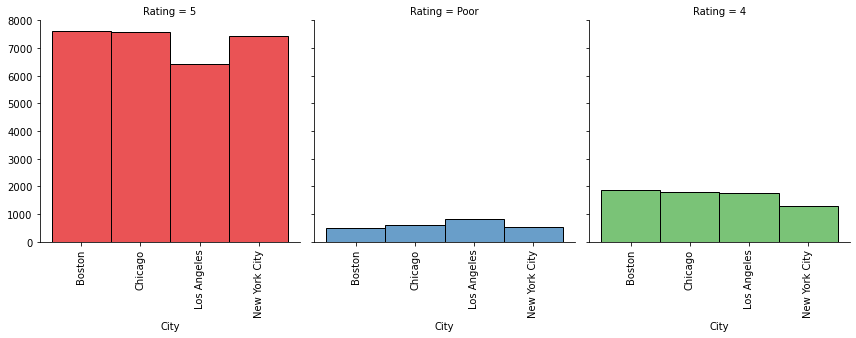

In [84]:
# %matplotlib notebook
ratingsgrid = sns.FacetGrid(data=ta_chng_rat, col='Rating', hue="Rating", palette="Set1", height=4)
ratingsgrid.map(sns.histplot, 'City', kde=False)
ratingsgrid.set_xticklabels(rotation='vertical', fontsize=10)

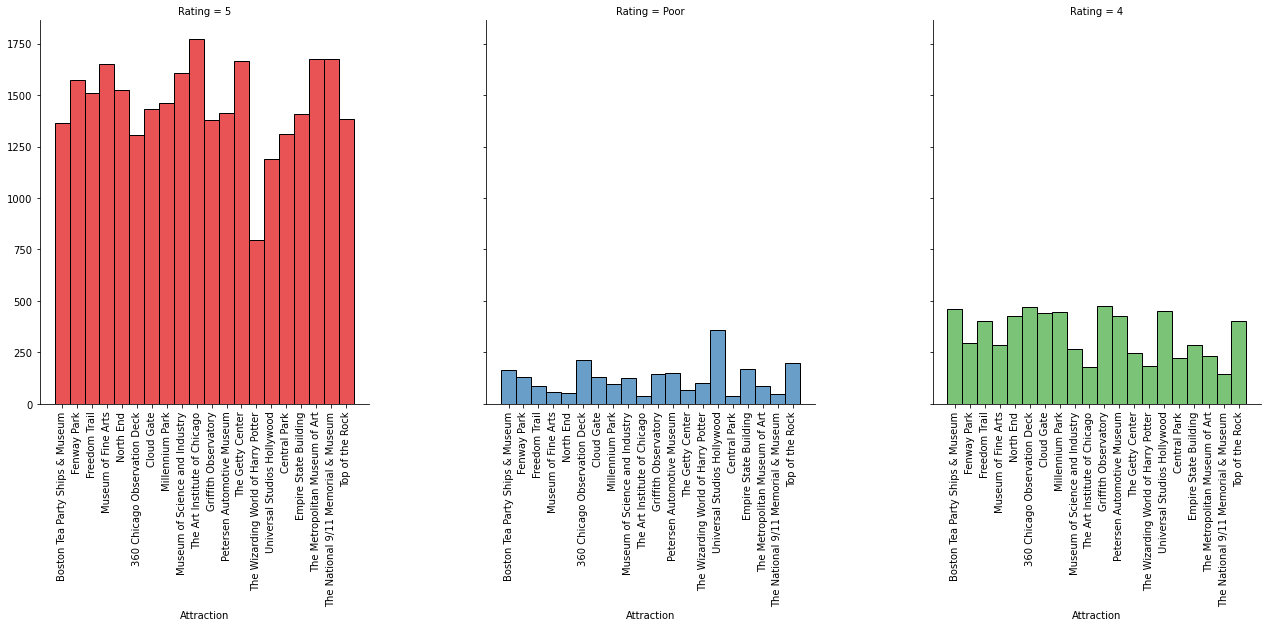

In [85]:
ratingsgrid = sns.FacetGrid(data=ta_chng_rat, col='Rating', hue="Rating", palette="Set1", height=6.25, aspect=1)
ratingsgrid.map(sns.histplot, 'Attraction', kde=False)
ratingsgrid.set_xticklabels(rotation='vertical', fontsize=10)


In [86]:
ta_5vspoor = ta_chng_rat[(ta_chng_rat['City']=='Boston') ]

ta_5vspoor.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
20873,Museum of Fine Arts,Boston,17-Apr,17-Apr,40,11,0,4,A must when visiting Boston. Expensive. Matiss...,Excellent experience,WisconsinGrandma,Crivitz,Wisconsin,,,
26354,North End,Boston,19-Oct,19-Oct,18,2,0,5,Settled by Italian immigrants the North End is...,Italian immigrant history,Pat D,,,,,
23467,Boston Tea Party Ships & Museum,Boston,18-Jun,18-Jun,4,1,0,5,If you like your entertainment to be interacti...,Tip top ‘tainment,Dervilla O,Bray,Ireland,,,
27706,Fenway Park,Boston,19-Aug,19-Aug,11,0,0,5,The tour was well organized ran on time. Those...,Fun at fenway,cmoser48,Atwater,Ohio,,,
23172,Boston Tea Party Ships & Museum,Boston,17-Oct,17-Sep,450,164,0,5,although it's a Tourist hotspot it's interesti...,understandin the Tea Party,globalJuergen,Erlangen,,,,
26921,Fenway Park,Boston,18-Nov,18-Aug,55,6,0,5,Fenway is a great ballpark to visit. 2nd oldes...,Red Sox Win,509314,Spokane,Washington,,,
24368,Boston Tea Party Ships & Museum,Boston,19-Oct,19-Oct,17,17,1,5,This was the highlight of my recent trip to Bo...,Awesome experience,Mitch S,Richmond,Virginia,,,
26939,Fenway Park,Boston,18-Nov,18-Aug,108,18,0,5,We did the VIP tour of the stadium and it was ...,Great Place,1witchy1,Woodstock,Virginia,,,
20018,Freedom Trail,Boston,19-Aug,19-Aug,176,105,0,4,Really enjoyed the freedom trail and one every...,Great piece of history...,RPAPKPMP,Stourbridge,United Kingdom,,,
24574,North End,Boston,16-Oct,16-Oct,97,61,0,4,I rented a condo in the North End for sightsee...,Love Staying in This Part of Boston,Cheesehead_In_Texas,The Woodlands,Texas,,,


# Using Word Lemmatizer to Analyze Text Data

- Single Word Analysis

In [87]:
# lemmatizer= WordNetLemmatizer()
# stop_filters = stopwords.words('english') + list(string.punctuation) + ['boston', '’', "n't", "'s", 'u', 'get', "'m", 
#                                                                         'also', '...' ,"''", '``', '--']
# bos_5star_corpus = ' '.join(ta_bos_5vspoor[ta_bos_5vspoor['Rating']==5]['Text']).lower()
# bos_5star_tokens = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(bos_5star_corpus) if tokens not in stop_filters]


# fdist_boshelp = FreqDist(boshelp_tokens)
# fdist_boshelp.most_common(50)

- Bigram Analysis

In [88]:
lemmatizer= WordNetLemmatizer()
stop_filters = stopwords.words('english') + list(string.punctuation) + ['boston', '’', "n't", "'s", 'u', 'get', "'m", 
                                                                        'also', '...' ,"'", '`', '-', '"']

# 5 Star Analysis

corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

bigram_5star = list(nltk.bigrams(tokens_5star))
fdist_bi_5star = FreqDist(bigram_5star)
fdist_bi_5star.most_common(50)

[(('north', 'end'), 983),
 (('freedom', 'trail'), 856),
 (('tea', 'party'), 580),
 (('tour', 'guide'), 471),
 (('paul', 'revere'), 422),
 (('fenway', 'park'), 407),
 (('red', 'sox'), 383),
 (('highly', 'recommend'), 377),
 (('well', 'worth'), 310),
 (('north', 'church'), 301),
 (('green', 'monster'), 264),
 (('baseball', 'fan'), 259),
 (('old', 'north'), 257),
 (('revere', 'house'), 239),
 (('must', 'see'), 236),
 (('italian', 'restaurant'), 230),
 (('gift', 'shop'), 221),
 (('bunker', 'hill'), 214),
 (('great', 'way'), 195),
 (('along', 'way'), 195),
 (('really', 'enjoyed'), 193),
 (('guided', 'tour'), 192),
 (('great', 'place'), 191),
 (('fine', 'art'), 188),
 (('italian', 'food'), 185),
 (('tea', 'room'), 167),
 (('us', 'constitution'), 159),
 (('well', 'done'), 156),
 (('art', 'museum'), 155),
 (('great', 'time'), 153),
 (('much', 'history'), 152),
 (('easy', 'follow'), 149),
 (('year', 'old'), 145),
 (('much', 'see'), 144),
 (('walk', 'around'), 142),
 (('red', 'brick'), 142),
 ((

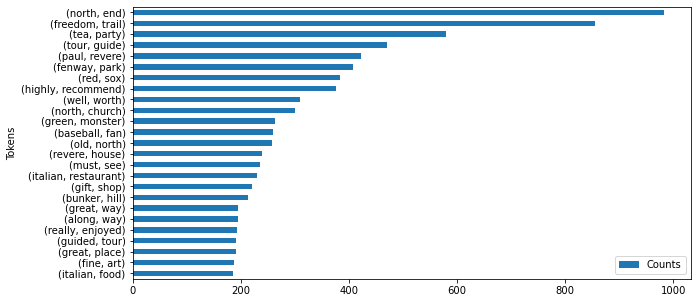

In [89]:
# Graph of 5 Star Bigram

fdist_bi_5star_graph = pd.DataFrame(fdist_bi_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_graph.invert_yaxis()

In [90]:
# 4 Star Analysis

corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

bigram_4star = list(nltk.bigrams(tokens_4star))
fdist_bi_4star = FreqDist(bigram_4star)
fdist_bi_4star.most_common(50)

[(('tea', 'party'), 231),
 (('freedom', 'trail'), 227),
 (('north', 'end'), 215),
 (('paul', 'revere'), 111),
 (('tour', 'guide'), 86),
 (('italian', 'restaurant'), 77),
 (('red', 'sox'), 75),
 (('gift', 'shop'), 66),
 (('revere', 'house'), 63),
 (('great', 'way'), 62),
 (('fenway', 'park'), 61),
 (('north', 'church'), 60),
 (('really', 'enjoyed'), 56),
 (('worth', 'visit'), 55),
 (('well', 'worth'), 54),
 (('old', 'north'), 51),
 (('walk', 'around'), 50),
 (('guided', 'tour'), 49),
 (('red', 'brick'), 49),
 (('along', 'way'), 49),
 (('baseball', 'fan'), 49),
 (('great', 'place'), 47),
 (('green', 'monster'), 44),
 (('would', 'recommend'), 43),
 (('must', 'see'), 41),
 (('little', 'italy'), 41),
 (('bunker', 'hill'), 39),
 (('italian', 'food'), 38),
 (('mike', 'pastry'), 38),
 (('tea', 'room'), 37),
 (('lot', 'history'), 37),
 (('easy', 'follow'), 36),
 (('walking', 'tour'), 35),
 (('great', 'time'), 34),
 (('highly', 'recommend'), 32),
 (('make', 'sure'), 32),
 (('walking', 'around'),

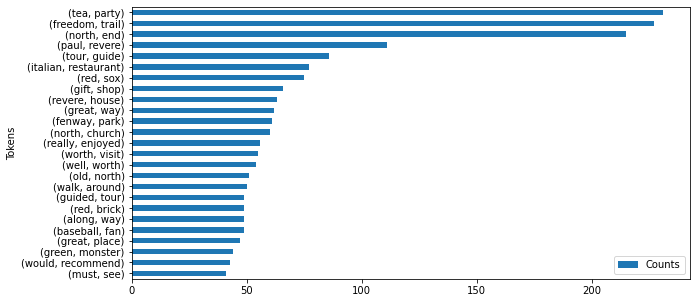

In [91]:
# Graph of 4 Star Bigram

fdist_bi_4star_graph = pd.DataFrame(fdist_bi_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_4star_graph.invert_yaxis()

In [92]:
# Poor Analysis

corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

bigram_poor = list(nltk.bigrams(tokens_poor))
fdist_bi_poor = FreqDist(bigram_poor)
fdist_bi_poor.most_common(50)

[(('tour', 'guide'), 44),
 (('tea', 'party'), 41),
 (('freedom', 'trail'), 36),
 (('gift', 'shop'), 27),
 (('red', 'sox'), 26),
 (('north', 'end'), 22),
 (('tea', 'room'), 19),
 (('green', 'monster'), 17),
 (('guided', 'tour'), 15),
 (('fenway', 'park'), 15),
 (('baseball', 'fan'), 15),
 (('many', 'people'), 13),
 (('paul', 'revere'), 13),
 (('walk', 'around'), 12),
 (('museum', 'experience'), 11),
 (('actor', 'good'), 10),
 (('part', 'tour'), 10),
 (('locker', 'room'), 10),
 (('bunker', 'hill'), 10),
 (('year', 'old'), 9),
 (('ship', 'museum'), 9),
 (('sox', 'fan'), 9),
 (('took', 'u'), 9),
 (('one', 'hour'), 8),
 (('replica', 'ship'), 8),
 (('felt', 'like'), 8),
 (('much', 'better'), 8),
 (('tour', 'group'), 8),
 (('across', 'street'), 8),
 (('must', 'see'), 8),
 (('old', 'north'), 8),
 (('north', 'church'), 8),
 (('easy', 'follow'), 8),
 (('tea', 'box'), 7),
 (('really', 'good'), 7),
 (('ticket', 'online'), 7),
 (('would', 'recommend'), 7),
 (('tea', 'chest'), 7),
 (('tourist', 'tra

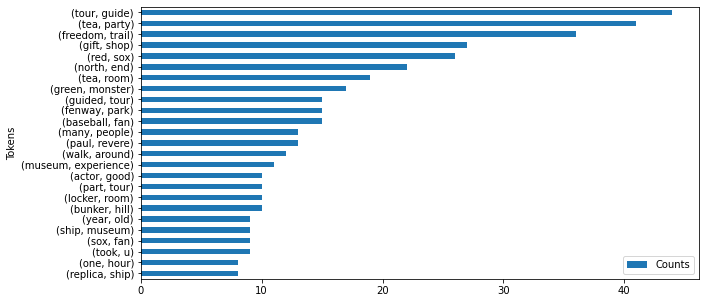

In [93]:
# Graph of Poor Bigram

fdist_bi_poor_graph = pd.DataFrame(fdist_bi_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_poor_graph.invert_yaxis()

- Plot of the top 25 most used words for reviews regarding the top 5 Boston Attractions

- We see some similar words that we saw in the analysis of helpful reviews of Boston's Attractions

- A small sample of the reviews found where the word 'tour' was mentioned in helpful reviews of Boston

In [94]:
bigram_words_5star = [tup[0] for tup in fdist_bi_5star.most_common(50)]
bigram_words_5star

[('north', 'end'),
 ('freedom', 'trail'),
 ('tea', 'party'),
 ('tour', 'guide'),
 ('paul', 'revere'),
 ('fenway', 'park'),
 ('red', 'sox'),
 ('highly', 'recommend'),
 ('well', 'worth'),
 ('north', 'church'),
 ('green', 'monster'),
 ('baseball', 'fan'),
 ('old', 'north'),
 ('revere', 'house'),
 ('must', 'see'),
 ('italian', 'restaurant'),
 ('gift', 'shop'),
 ('bunker', 'hill'),
 ('great', 'way'),
 ('along', 'way'),
 ('really', 'enjoyed'),
 ('guided', 'tour'),
 ('great', 'place'),
 ('fine', 'art'),
 ('italian', 'food'),
 ('tea', 'room'),
 ('us', 'constitution'),
 ('well', 'done'),
 ('art', 'museum'),
 ('great', 'time'),
 ('much', 'history'),
 ('easy', 'follow'),
 ('year', 'old'),
 ('much', 'see'),
 ('walk', 'around'),
 ('red', 'brick'),
 ('little', 'italy'),
 ('museum', 'fine'),
 ('mike', 'pastry'),
 ('one', 'best'),
 ('make', 'sure'),
 ('ball', 'park'),
 ('worth', 'visit'),
 ('great', 'experience'),
 ('american', 'history'),
 ('way', 'see'),
 ('would', 'recommend'),
 ('go', 'back'),
 ('

In [95]:
bigram_words_4star = [tup[0] for tup in fdist_bi_4star.most_common(50)]
bigram_words_4star

[('tea', 'party'),
 ('freedom', 'trail'),
 ('north', 'end'),
 ('paul', 'revere'),
 ('tour', 'guide'),
 ('italian', 'restaurant'),
 ('red', 'sox'),
 ('gift', 'shop'),
 ('revere', 'house'),
 ('great', 'way'),
 ('fenway', 'park'),
 ('north', 'church'),
 ('really', 'enjoyed'),
 ('worth', 'visit'),
 ('well', 'worth'),
 ('old', 'north'),
 ('walk', 'around'),
 ('guided', 'tour'),
 ('red', 'brick'),
 ('along', 'way'),
 ('baseball', 'fan'),
 ('great', 'place'),
 ('green', 'monster'),
 ('would', 'recommend'),
 ('must', 'see'),
 ('little', 'italy'),
 ('bunker', 'hill'),
 ('italian', 'food'),
 ('mike', 'pastry'),
 ('tea', 'room'),
 ('lot', 'history'),
 ('easy', 'follow'),
 ('walking', 'tour'),
 ('great', 'time'),
 ('highly', 'recommend'),
 ('make', 'sure'),
 ('walking', 'around'),
 ('tea', 'overboard'),
 ('year', 'old'),
 ('throwing', 'tea'),
 ('way', 'see'),
 ('party', 'ship'),
 ('well', 'done'),
 ('american', 'history'),
 ('us', 'constitution'),
 ('ship', 'museum'),
 ('throw', 'tea'),
 ('really'

In [96]:
bigram_words_poor = [tup[0] for tup in fdist_bi_poor.most_common(50)]
bigram_words_poor

[('tour', 'guide'),
 ('tea', 'party'),
 ('freedom', 'trail'),
 ('gift', 'shop'),
 ('red', 'sox'),
 ('north', 'end'),
 ('tea', 'room'),
 ('green', 'monster'),
 ('guided', 'tour'),
 ('fenway', 'park'),
 ('baseball', 'fan'),
 ('many', 'people'),
 ('paul', 'revere'),
 ('walk', 'around'),
 ('museum', 'experience'),
 ('actor', 'good'),
 ('part', 'tour'),
 ('locker', 'room'),
 ('bunker', 'hill'),
 ('year', 'old'),
 ('ship', 'museum'),
 ('sox', 'fan'),
 ('took', 'u'),
 ('one', 'hour'),
 ('replica', 'ship'),
 ('felt', 'like'),
 ('much', 'better'),
 ('tour', 'group'),
 ('across', 'street'),
 ('must', 'see'),
 ('old', 'north'),
 ('north', 'church'),
 ('easy', 'follow'),
 ('tea', 'box'),
 ('really', 'good'),
 ('ticket', 'online'),
 ('would', 'recommend'),
 ('tea', 'chest'),
 ('tourist', 'trap'),
 ('time', 'money'),
 ('go', 'back'),
 ('make', 'sure'),
 ('batting', 'practice'),
 ('red', 'brick'),
 ('art', 'museum'),
 ('little', 'italy'),
 ('tea', 'shop'),
 ('people', 'group'),
 ('customer', 'service

# Would it be better to get rid of some more of the words?

# Which words would be more useful?

In [97]:
bigram_common_words = list(set(bigram_words_5star).intersection(bigram_words_poor))
bigram_common_words = list(set(bigram_common_words).intersection(bigram_words_4star))
bigram_common_words

[('must', 'see'),
 ('north', 'church'),
 ('fenway', 'park'),
 ('red', 'sox'),
 ('year', 'old'),
 ('freedom', 'trail'),
 ('bunker', 'hill'),
 ('old', 'north'),
 ('paul', 'revere'),
 ('walk', 'around'),
 ('would', 'recommend'),
 ('tea', 'party'),
 ('north', 'end'),
 ('guided', 'tour'),
 ('green', 'monster'),
 ('red', 'brick'),
 ('tea', 'room'),
 ('make', 'sure'),
 ('easy', 'follow'),
 ('gift', 'shop'),
 ('tour', 'guide'),
 ('little', 'italy'),
 ('baseball', 'fan')]

In [98]:
words_5star_count = [tup for tup in fdist_bi_5star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_5star_count))

words_5star_count_df = pd.DataFrame(words_5star_count, columns = ['Words', '5Star_Count'])
words_5star_count_df

23


,Words,5Star_Count
0,"(north, end)",983
1,"(freedom, trail)",856
2,"(tea, party)",580
3,"(tour, guide)",471
4,"(paul, revere)",422
5,"(fenway, park)",407
6,"(red, sox)",383
7,"(north, church)",301
8,"(green, monster)",264
9,"(baseball, fan)",259


In [99]:
words_4star_count = [tup for tup in fdist_bi_4star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_4star_count))

words_4star_count_df = pd.DataFrame(words_4star_count, columns = ['Words', '4Star_Count'])
words_4star_count_df

23


,Words,4Star_Count
0,"(tea, party)",231
1,"(freedom, trail)",227
2,"(north, end)",215
3,"(paul, revere)",111
4,"(tour, guide)",86
5,"(red, sox)",75
6,"(gift, shop)",66
7,"(fenway, park)",61
8,"(north, church)",60
9,"(old, north)",51


In [100]:
words_poor_count = [tup for tup in fdist_bi_poor.most_common(50) if tup[0] in bigram_common_words]
print(len(words_poor_count))

words_poor_count_df = pd.DataFrame(words_poor_count, columns = ['Words', 'Poor_Count'])
words_poor_count_df

23


,Words,Poor_Count
0,"(tour, guide)",44
1,"(tea, party)",41
2,"(freedom, trail)",36
3,"(gift, shop)",27
4,"(red, sox)",26
5,"(north, end)",22
6,"(tea, room)",19
7,"(green, monster)",17
8,"(guided, tour)",15
9,"(fenway, park)",15


In [101]:
from functools import reduce

dfs = [words_5star_count_df, words_4star_count_df, words_poor_count_df]

combined_words_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), dfs)
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",983,215,22
1,"(freedom, trail)",856,227,36
2,"(tea, party)",580,231,41
3,"(tour, guide)",471,86,44
4,"(paul, revere)",422,111,13
5,"(fenway, park)",407,61,15
6,"(red, sox)",383,75,26
7,"(north, church)",301,60,8
8,"(green, monster)",264,44,17
9,"(baseball, fan)",259,49,15


In [102]:
# rc('font', weight='bold')
# bars = np.add(bars1, bars2).tolist()
# r = [0,1,2,3,4]
# names = ['A','B','C','D','E']


# Should I be using Percentage instead?

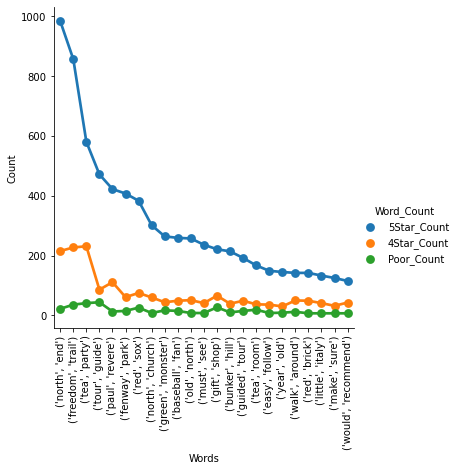

<Figure size 720x360 with 0 Axes>

In [103]:
combined_words_df_plot = combined_words_df.melt('Words', var_name='Word_Count', value_name = 'Count')
combined_words_df_plot = sns.catplot(x="Words", y="Count", hue='Word_Count', data=combined_words_df_plot, kind='point')
plt.figure(figsize=(10,5))
combined_words_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

# Should I be using a t-test to determine anything here?

In [104]:
# t, p = stats.ttest_1samp(len_helprev, 262.4028)
# t, p

- Trigram Analysis

In [105]:
# 5 Star Analysis

trigram_5star = list(nltk.trigrams(tokens_5star))
fdist_tri_5star = FreqDist(trigram_5star)
fdist_tri_5star.most_common(50)

[(('old', 'north', 'church'), 251),
 (('paul', 'revere', 'house'), 229),
 (('museum', 'fine', 'art'), 130),
 (('would', 'highly', 'recommend'), 95),
 (('tea', 'party', 'ship'), 80),
 (('red', 'sox', 'fan'), 74),
 (('church', 'paul', 'revere'), 74),
 (('bunker', 'hill', 'monument'), 73),
 (('north', 'church', 'paul'), 66),
 (('well', 'worth', 'visit'), 65),
 (('great', 'way', 'see'), 64),
 (('house', 'old', 'north'), 58),
 (('revere', 'house', 'old'), 57),
 (('party', 'ship', 'museum'), 54),
 (('highly', 'recommend', 'tour'), 54),
 (('follow', 'red', 'brick'), 49),
 (('tea', 'party', 'museum'), 47),
 (('along', 'freedom', 'trail'), 47),
 (('red', 'sox', 'game'), 45),
 (('john', 'singer', 'sargent'), 45),
 (('fenway', 'park', 'tour'), 44),
 (('walking', 'freedom', 'trail'), 43),
 (('tour', 'guide', 'knowledgeable'), 41),
 (('abigail', 'tea', 'room'), 40),
 (('walk', 'freedom', 'trail'), 40),
 (('walked', 'freedom', 'trail'), 40),
 (('wear', 'comfortable', 'shoe'), 37),
 (('throw', 'tea',

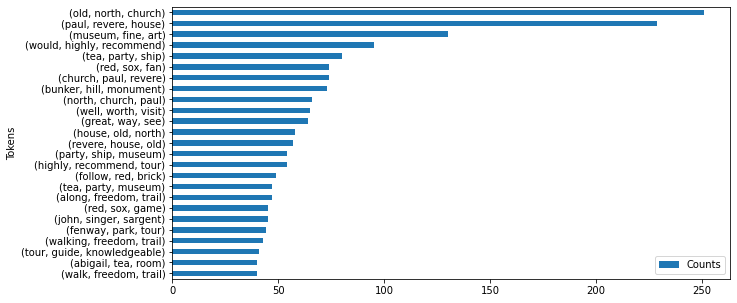

In [106]:
# Graph of 5 Star Trigram

fdist_tri_5star_graph = pd.DataFrame(fdist_tri_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_5star_graph.invert_yaxis()

In [107]:
# 4 Star Analysis

trigram_4star = list(nltk.trigrams(tokens_4star))
fdist_tri_4star = FreqDist(trigram_4star)
fdist_tri_4star.most_common(50)

[(('paul', 'revere', 'house'), 63),
 (('old', 'north', 'church'), 48),
 (('tea', 'party', 'ship'), 28),
 (('museum', 'fine', 'art'), 19),
 (('tea', 'party', 'museum'), 18),
 (('throwing', 'tea', 'overboard'), 17),
 (('well', 'worth', 'visit'), 17),
 (('follow', 'red', 'brick'), 16),
 (('party', 'ship', 'museum'), 14),
 (('bunker', 'hill', 'monument'), 14),
 (('around', 'north', 'end'), 14),
 (('great', 'way', 'see'), 13),
 (('lot', 'italian', 'restaurant'), 12),
 (('learn', 'tea', 'party'), 11),
 (('red', 'sox', 'game'), 11),
 (('freedom', 'trail', 'great'), 11),
 (('church', 'paul', 'revere'), 11),
 (('walk', 'freedom', 'trail'), 11),
 (('revere', 'house', 'old'), 11),
 (('house', 'old', 'north'), 11),
 (('history', 'tea', 'party'), 10),
 (('``', 'tea', "''"), 10),
 (('would', 'highly', 'recommend'), 10),
 (('great', 'way', 'spend'), 10),
 (('tour', 'guide', 'knowledgeable'), 10),
 (('red', 'brick', 'line'), 10),
 (('north', 'end', 'great'), 10),
 (('many', 'italian', 'restaurant'), 1

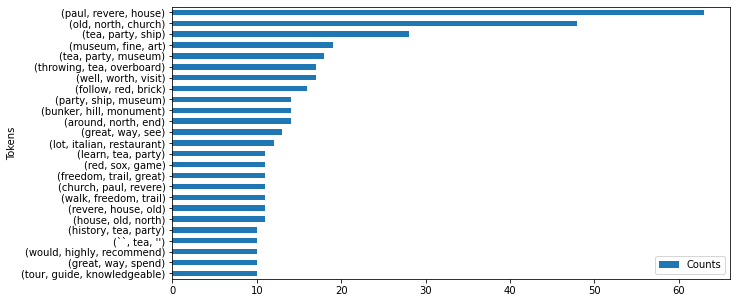

In [108]:
# Graph of 4 Star Trigram

fdist_tri_4star_graph = pd.DataFrame(fdist_tri_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_4star_graph.invert_yaxis()

In [109]:
# Poor Analysis

trigram_poor = list(nltk.trigrams(tokens_poor))
fdist_tri_poor = FreqDist(trigram_poor)
fdist_tri_poor.most_common(50)

[(('old', 'north', 'church'), 8),
 (('tea', 'party', 'ship'), 6),
 (('party', 'ship', 'museum'), 5),
 (('red', 'sox', 'fan'), 5),
 (('paul', 'revere', 'house'), 5),
 (('tea', 'party', 'experience'), 4),
 (('many', 'people', 'tour'), 4),
 (('huge', 'baseball', 'fan'), 4),
 (('visitor', 'locker', 'room'), 4),
 (('top', 'green', 'monster'), 4),
 (('dugout', 'locker', 'room'), 4),
 (('walked', 'freedom', 'trail'), 4),
 (('house', 'old', 'north'), 4),
 (('trail', 'easy', 'follow'), 4),
 (('gift', 'shop', 'tea'), 3),
 (('kid', 'would', 'probably'), 3),
 (('great', 'gift', 'shop'), 3),
 (('``', 'tea', "''"), 3),
 (('waste', 'money', 'tour'), 3),
 (('throwing', 'tea', 'harbor'), 3),
 (('abigail', 'tea', 'room'), 3),
 (('tour', 'gift', 'shop'), 3),
 (('tea', 'party', 'museum'), 3),
 (('“', 'tea', '”'), 3),
 (('waste', 'time', 'money'), 3),
 (('self', 'guided', 'tour'), 3),
 (('revere', 'house', 'old'), 3),
 (('shop', 'tea', 'shop'), 2),
 (('think', 'kid', 'like'), 2),
 (('``', 'museum', "''"), 

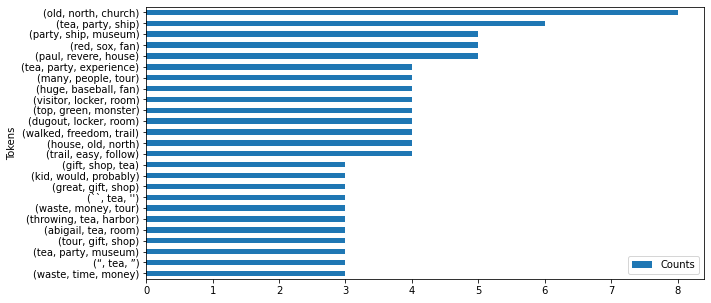

In [110]:
# Graph of Poor Bigram

fdist_tri_poor_graph = pd.DataFrame(fdist_tri_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_poor_graph.invert_yaxis()

In [111]:
trigram_words_5star = [tup[0] for tup in fdist_tri_5star.most_common(50)]
trigram_words_5star

[('old', 'north', 'church'),
 ('paul', 'revere', 'house'),
 ('museum', 'fine', 'art'),
 ('would', 'highly', 'recommend'),
 ('tea', 'party', 'ship'),
 ('red', 'sox', 'fan'),
 ('church', 'paul', 'revere'),
 ('bunker', 'hill', 'monument'),
 ('north', 'church', 'paul'),
 ('well', 'worth', 'visit'),
 ('great', 'way', 'see'),
 ('house', 'old', 'north'),
 ('revere', 'house', 'old'),
 ('party', 'ship', 'museum'),
 ('highly', 'recommend', 'tour'),
 ('follow', 'red', 'brick'),
 ('tea', 'party', 'museum'),
 ('along', 'freedom', 'trail'),
 ('red', 'sox', 'game'),
 ('john', 'singer', 'sargent'),
 ('fenway', 'park', 'tour'),
 ('walking', 'freedom', 'trail'),
 ('tour', 'guide', 'knowledgeable'),
 ('abigail', 'tea', 'room'),
 ('walk', 'freedom', 'trail'),
 ('walked', 'freedom', 'trail'),
 ('wear', 'comfortable', 'shoe'),
 ('throw', 'tea', 'overboard'),
 ('visit', 'north', 'end'),
 ('north', 'end', 'great'),
 ('history', 'tea', 'party'),
 ('tour', 'fenway', 'park'),
 ('love', 'north', 'end'),
 ('would'

In [112]:
trigram_words_4star = [tup[0] for tup in fdist_tri_4star.most_common(50)]
trigram_words_4star

[('paul', 'revere', 'house'),
 ('old', 'north', 'church'),
 ('tea', 'party', 'ship'),
 ('museum', 'fine', 'art'),
 ('tea', 'party', 'museum'),
 ('throwing', 'tea', 'overboard'),
 ('well', 'worth', 'visit'),
 ('follow', 'red', 'brick'),
 ('party', 'ship', 'museum'),
 ('bunker', 'hill', 'monument'),
 ('around', 'north', 'end'),
 ('great', 'way', 'see'),
 ('lot', 'italian', 'restaurant'),
 ('learn', 'tea', 'party'),
 ('red', 'sox', 'game'),
 ('freedom', 'trail', 'great'),
 ('church', 'paul', 'revere'),
 ('walk', 'freedom', 'trail'),
 ('revere', 'house', 'old'),
 ('house', 'old', 'north'),
 ('history', 'tea', 'party'),
 ('``', 'tea', "''"),
 ('would', 'highly', 'recommend'),
 ('great', 'way', 'spend'),
 ('tour', 'guide', 'knowledgeable'),
 ('red', 'brick', 'line'),
 ('north', 'end', 'great'),
 ('many', 'italian', 'restaurant'),
 ('story', 'tea', 'party'),
 ('would', 'definitely', 'recommend'),
 ('walking', 'freedom', 'trail'),
 ('red', 'sox', 'fan'),
 ('trail', 'great', 'way'),
 ('self', '

In [113]:
trigram_words_poor = [tup[0] for tup in fdist_tri_poor.most_common(50)]
trigram_words_poor

[('old', 'north', 'church'),
 ('tea', 'party', 'ship'),
 ('party', 'ship', 'museum'),
 ('red', 'sox', 'fan'),
 ('paul', 'revere', 'house'),
 ('tea', 'party', 'experience'),
 ('many', 'people', 'tour'),
 ('huge', 'baseball', 'fan'),
 ('visitor', 'locker', 'room'),
 ('top', 'green', 'monster'),
 ('dugout', 'locker', 'room'),
 ('walked', 'freedom', 'trail'),
 ('house', 'old', 'north'),
 ('trail', 'easy', 'follow'),
 ('gift', 'shop', 'tea'),
 ('kid', 'would', 'probably'),
 ('great', 'gift', 'shop'),
 ('``', 'tea', "''"),
 ('waste', 'money', 'tour'),
 ('throwing', 'tea', 'harbor'),
 ('abigail', 'tea', 'room'),
 ('tour', 'gift', 'shop'),
 ('tea', 'party', 'museum'),
 ('“', 'tea', '”'),
 ('waste', 'time', 'money'),
 ('self', 'guided', 'tour'),
 ('revere', 'house', 'old'),
 ('shop', 'tea', 'shop'),
 ('think', 'kid', 'like'),
 ('``', 'museum', "''"),
 ('young', 'actor', 'take'),
 ('nice', 'way', 'spend'),
 ('way', 'spend', 'hour'),
 ('would', 'probably', 'really'),
 ('trolley', 'tour', 'decided

In [114]:
trigram_common_words = list(set(trigram_words_5star).intersection(trigram_words_poor))
trigram_common_words = list(set(trigram_common_words).intersection(trigram_words_4star))
trigram_common_words

[('house', 'old', 'north'),
 ('red', 'sox', 'fan'),
 ('party', 'ship', 'museum'),
 ('old', 'north', 'church'),
 ('revere', 'house', 'old'),
 ('tea', 'party', 'ship'),
 ('paul', 'revere', 'house'),
 ('tea', 'party', 'museum'),
 ('``', 'tea', "''"),
 ('self', 'guided', 'tour'),
 ('abigail', 'tea', 'room')]

In [115]:
words_5star_tri_count = [tup for tup in fdist_tri_5star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_5star_tri_count))

words_5star_tri_count_df = pd.DataFrame(words_5star_tri_count, columns = ['Words', '5Star_Count'])
words_5star_tri_count_df

11


,Words,5Star_Count
0,"(old, north, church)",251
1,"(paul, revere, house)",229
2,"(tea, party, ship)",80
3,"(red, sox, fan)",74
4,"(house, old, north)",58
5,"(revere, house, old)",57
6,"(party, ship, museum)",54
7,"(tea, party, museum)",47
8,"(abigail, tea, room)",40
9,"(self, guided, tour)",34


In [116]:
words_4star_tri_count = [tup for tup in fdist_tri_4star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_4star_tri_count))


words_4star_tri_count_df = pd.DataFrame(words_4star_tri_count, columns = ['Words', '4Star_Count'])
words_4star_tri_count_df

11


,Words,4Star_Count
0,"(paul, revere, house)",63
1,"(old, north, church)",48
2,"(tea, party, ship)",28
3,"(tea, party, museum)",18
4,"(party, ship, museum)",14
5,"(revere, house, old)",11
6,"(house, old, north)",11
7,"(``, tea, '')",10
8,"(red, sox, fan)",9
9,"(self, guided, tour)",9


In [117]:
words_poor_tri_count = [tup for tup in fdist_tri_poor.most_common(50) if tup[0] in trigram_common_words]
print(len(words_poor_tri_count))

words_poor_tri_count_df = pd.DataFrame(words_poor_tri_count, columns = ['Words', 'Poor_Count'])
words_poor_tri_count_df

11


,Words,Poor_Count
0,"(old, north, church)",8
1,"(tea, party, ship)",6
2,"(party, ship, museum)",5
3,"(red, sox, fan)",5
4,"(paul, revere, house)",5
5,"(house, old, north)",4
6,"(``, tea, '')",3
7,"(abigail, tea, room)",3
8,"(tea, party, museum)",3
9,"(self, guided, tour)",3


In [118]:
from functools import reduce

tri_dfs = [words_5star_tri_count_df, words_4star_tri_count_df, words_poor_tri_count_df]

combined_words_tri_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), tri_dfs)
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(old, north, church)",251,48,8
1,"(paul, revere, house)",229,63,5
2,"(tea, party, ship)",80,28,6
3,"(red, sox, fan)",74,9,5
4,"(house, old, north)",58,11,4
5,"(revere, house, old)",57,11,3
6,"(party, ship, museum)",54,14,5
7,"(tea, party, museum)",47,18,3
8,"(abigail, tea, room)",40,7,3
9,"(self, guided, tour)",34,9,3


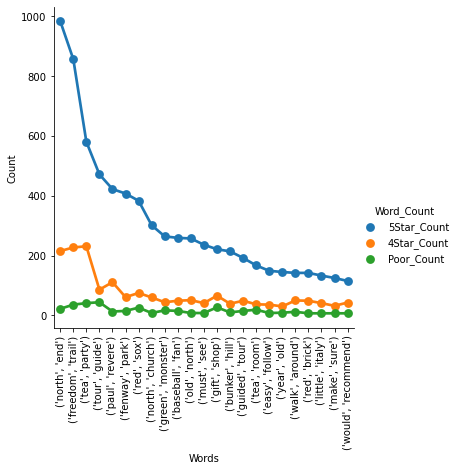

<Figure size 720x360 with 0 Axes>

In [119]:
combined_words_tri_df_plot = combined_words_df.melt('Words', var_name='Word_Count', value_name = 'Count')
combined_words_tri_df_plot = sns.catplot(x="Words", y="Count", hue='Word_Count', data=combined_words_tri_df_plot, kind='point')
plt.figure(figsize=(10,5))
combined_words_tri_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

# To determine the percentage of helpful votes for 5 star and Poor

In [121]:
ta_5vspoor_helpful_df = ta_5vspoor[ta_5vspoor['Review_Helpful']>0]
ta_5vspoor_helpful_df.sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
27227,Fenway Park,Boston,19-May,19-Apr,169,40,1,4,"First visit to Fenway, and even though we are ...",Iconic Fenway,Cynthia C,East Northport,New York,,,
24251,Boston Tea Party Ships & Museum,Boston,19-Aug,19-Aug,2,2,2,5,Excellent. Our 8 year old grandson is a Revolu...,Boston Tea Party ships and museum,JulieO148,Brookhaven,NY,,,
21622,Museum of Fine Arts,Boston,18-Feb,17-Aug,25,23,1,5,I had such a wonderful time at this Museum. A ...,What a geat day,mcintyre3197,Marshfield,Massachusetts,,,
25838,North End,Boston,18-Aug,18-Jul,38,9,1,5,"Beautiful place, full of history and home to t...",North End Boston,o5retired,Anderson,South Carolina,,,
24215,Boston Tea Party Ships & Museum,Boston,19-Aug,19-Jul,11,2,1,5,"I love this type of stuff, but part of the fam...",Even the non-historical loving wife enjoyed it!,boilerbc,Harrisonburg,Virginia,,,
21999,Museum of Fine Arts,Boston,18-Oct,18-Oct,"1,142",55,1,5,"I grew up in NYC with the Met, the MoMA, the F...",I think I have a new favorite museum,pirula778,McLean,Virginia,,,
23814,Boston Tea Party Ships & Museum,Boston,18-Oct,18-Oct,4,2,1,5,"What a fun, interactive way to learn the histo...",Outstanding!!!,Sally C,,,,,
19831,Freedom Trail,Boston,19-Jun,19-Jun,340,132,1,5,It's very simple... following the Freedom Trai...,By far the best way to visit Boston by walk,Christophe B,Quebec City,Canada,,,
27400,Fenway Park,Boston,19-Jun,19-Jun,1,1,1,5,Very basic tour of the top side of Fenway. You...,Fenway!!!,Winaac,,,,,
20058,Freedom Trail,Boston,19-Aug,19-Aug,138,114,3,5,"We walked the Freedom Trail both ways, startin...",Two days in Boston well sepnt,Soutanglie,Hartley Wintney,United Kingdom,,,


In [123]:
ta_5vspoor_helpful_df.count()

Attraction        1089
City              1089
Posted            1089
Visited           1089
User_Reviews      1089
User_Helpful      1089
Review_Helpful    1089
Rating            1089
Text              1089
Title             1089
Username          1088
User_Loc1         1089
User_Loc2         1089
User_Loc3         1089
User_Loc4         1089
User_Loc5         1089
dtype: int64

In [126]:
ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==5].count()

Attraction        811
City              811
Posted            811
Visited           811
User_Reviews      811
User_Helpful      811
Review_Helpful    811
Rating            811
Text              811
Title             811
Username          810
User_Loc1         811
User_Loc2         811
User_Loc3         811
User_Loc4         811
User_Loc5         811
dtype: int64

In [127]:
ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==4].count()

Attraction        188
City              188
Posted            188
Visited           188
User_Reviews      188
User_Helpful      188
Review_Helpful    188
Rating            188
Text              188
Title             188
Username          188
User_Loc1         188
User_Loc2         188
User_Loc3         188
User_Loc4         188
User_Loc5         188
dtype: int64

In [128]:
ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'].count()

Attraction        90
City              90
Posted            90
Visited           90
User_Reviews      90
User_Helpful      90
Review_Helpful    90
Rating            90
Text              90
Title             90
Username          90
User_Loc1         90
User_Loc2         90
User_Loc3         90
User_Loc4         90
User_Loc5         90
dtype: int64

In [129]:
ta_5vspoor[ta_5vspoor['Rating']==5].count()

Attraction        7622
City              7622
Posted            7622
Visited           7622
User_Reviews      7622
User_Helpful      7622
Review_Helpful    7622
Rating            7622
Text              7622
Title             7622
Username          7621
User_Loc1         7622
User_Loc2         7622
User_Loc3         7622
User_Loc4         7622
User_Loc5         7622
dtype: int64

In [130]:
ta_5vspoor[ta_5vspoor['Rating']==4].count()

Attraction        1873
City              1873
Posted            1873
Visited           1873
User_Reviews      1873
User_Helpful      1873
Review_Helpful    1873
Rating            1873
Text              1873
Title             1873
Username          1873
User_Loc1         1873
User_Loc2         1873
User_Loc3         1873
User_Loc4         1873
User_Loc5         1873
dtype: int64

In [131]:
ta_5vspoor[ta_5vspoor['Rating']=='Poor'].count()

Attraction        490
City              490
Posted            490
Visited           490
User_Reviews      490
User_Helpful      490
Review_Helpful    490
Rating            490
Text              490
Title             490
Username          490
User_Loc1         490
User_Loc2         490
User_Loc3         490
User_Loc4         490
User_Loc5         490
dtype: int64

In [132]:
# Helpful reviews that gave 5 stars

811/7622

0.10640251902387825

In [133]:
# Helpful reviews that gave 4 stars

188/1873

0.1003737319807795

In [134]:
# Helpful reviews that gave 3 or fewer stars

90/490

0.1836734693877551

- It seems that reviews that rated attractions with 3 stars or fewer were more likely to be viewed as helpful

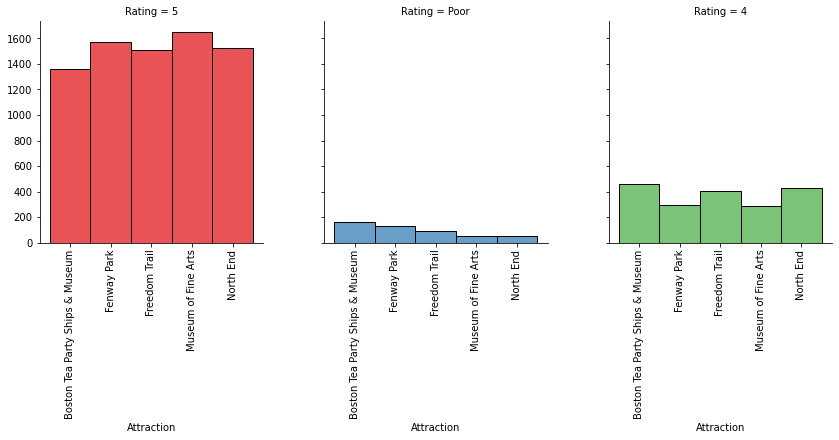

In [135]:
ratingsgrid = sns.FacetGrid(data=ta_5vspoor, col='Rating', hue="Rating", palette="Set1", height=4)
ratingsgrid.map(sns.histplot, 'Attraction', kde=False)
ratingsgrid.set_xticklabels(rotation='vertical', fontsize=10)

# Text Polarity/Basic Sentiment Analysis

In [136]:
from textblob import TextBlob

sample_size = 1000

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

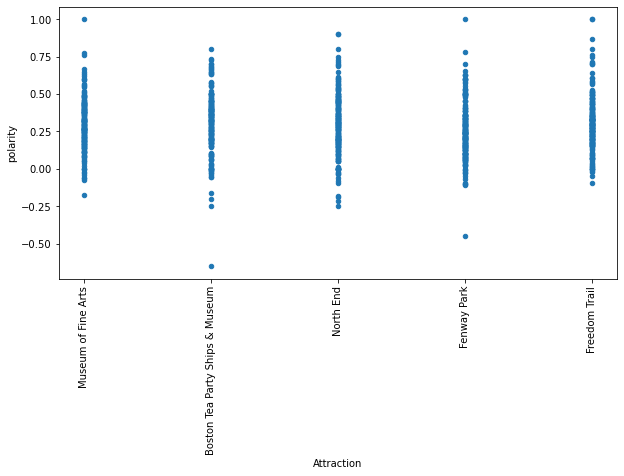

In [145]:
sample = ta_5vspoor.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

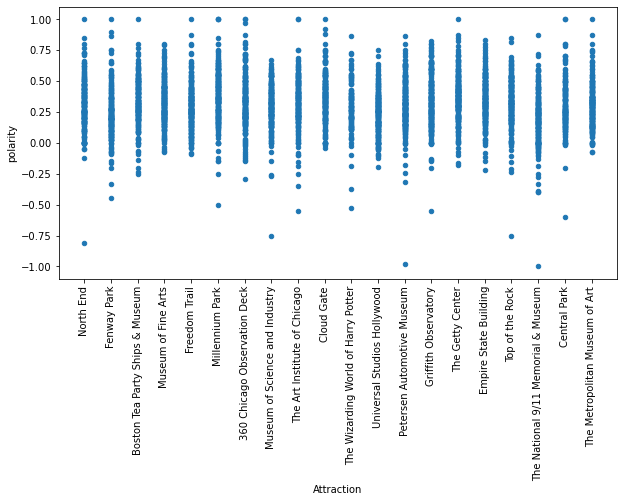

In [146]:
sample = group_city.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

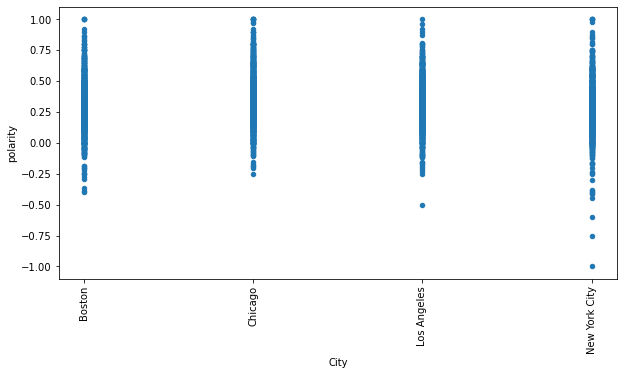

In [147]:
sample = group_city.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('City', 'polarity').tick_params(axis='x', labelrotation = 90)

# Analyzing Rating Based on Dates

In [148]:
ta_5vspoor.groupby('Attraction').agg(['count'])['Title']

,count
Attraction,
Boston Tea Party Ships & Museum,1990
Fenway Park,2000
Freedom Trail,2000
Museum of Fine Arts,1995
North End,2000


In [152]:
ta_5vspoor_1 = ta_5vspoor[(ta_5vspoor['Attraction']=='Boston Tea Party Ships & Museum')]
#                                   &
#                                   (ta_bos_5vspoor['Rating']==5)]
ta_5vspoor_1

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
0,Boston Tea Party Ships & Museum,Boston,17-Mar,17-Mar,360,186,0,5,We stopped over here on our way to the airport...,Entertaining and Educational,nadiag0610,San Diego,California,,,
1,Boston Tea Party Ships & Museum,Boston,17-Mar,17-Mar,174,17,0,5,Who knew committing treason could be fun? From...,History Comes Alive,1TravelNP,Greensboro,North Carolina,,,
2,Boston Tea Party Ships & Museum,Boston,17-Mar,17-Mar,31,11,0,5,Loved this. It's great fun and there are some ...,Really well done,Paulrob75,London,United Kingdom,,,
3,Boston Tea Party Ships & Museum,Boston,17-Mar,17-Mar,44,26,0,5,"Well organised tour, staff very knowledgeable ...",Very informative,budd1965,Derby,United Kingdom,,,
4,Boston Tea Party Ships & Museum,Boston,17-Mar,17-Mar,21,2,0,5,This museum is very interactive and extremely ...,Wow!,Kara B,Richmond,Texas,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34846,Boston Tea Party Ships & Museum,Boston,17-Nov,17-Sep,19,9,0,4,It was informative and fun - had some interest...,Tourism at its highest,AnnaDuke,Las Vegas,Nevada,,,
34849,Boston Tea Party Ships & Museum,Boston,17-Nov,17-Aug,78,8,0,4,What a well planned tourist attraction this is...,Take part,Diane A,Nuneaton,United Kingdom,,,
34851,Boston Tea Party Ships & Museum,Boston,17-Nov,17-Oct,15,6,0,5,This museum is an interactive one. The cast as...,History made Fun,Pamela F,Belton,,,,
34853,Boston Tea Party Ships & Museum,Boston,17-Nov,17-Oct,88,8,0,5,Excellent history in an interactive session wi...,Historical entertainment,Lauren P,Surrey,United Kingdom,,,


In [154]:
ta_5vspoor_1_df = ta_5vspoor_1.loc[:, ['Visited', 'Rating']]
ta_5vspoor_1_df.sample(15)

,Visited,Rating
24299,19-Sep,4
23276,17-Dec,5
24051,19-Jun,Poor
24248,19-Aug,5
24375,19-Oct,5
24171,19-Aug,5
24084,19-Jun,5
24293,0,4
23651,18-Aug,4
23501,18-Jun,4


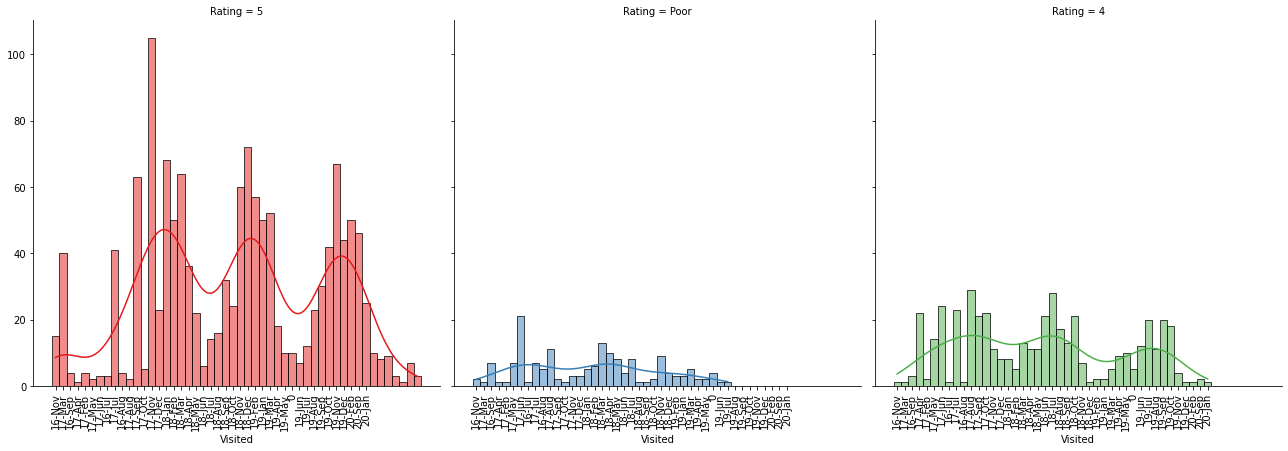

In [160]:
# x = np.linspace(0, 50, 100)
# y = x**(0.5)

visited_grid = sns.FacetGrid(data=ta_5vspoor_1_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1)
visited_grid.map(sns.histplot, "Visited", kde=True)
# plt.figure(figsize=(10,5))
# plt.plot(x, y)
visited_grid.set_xticklabels(rotation='vertical', fontsize=10)

In [161]:
ta_5vspoor_df = ta_5vspoor.loc[:, ['Visited', 'Rating']]
ta_5vspoor_df.sample(15)

,Visited,Rating
26033,18-Nov,4
34457,18-Sep,4
26113,19-Mar,4
26497,18-Aug,5
19753,19-May,5
20823,17-Mar,5
27484,19-Jun,5
24802,16-Sep,5
20075,19-Aug,5
18951,18-Sep,4


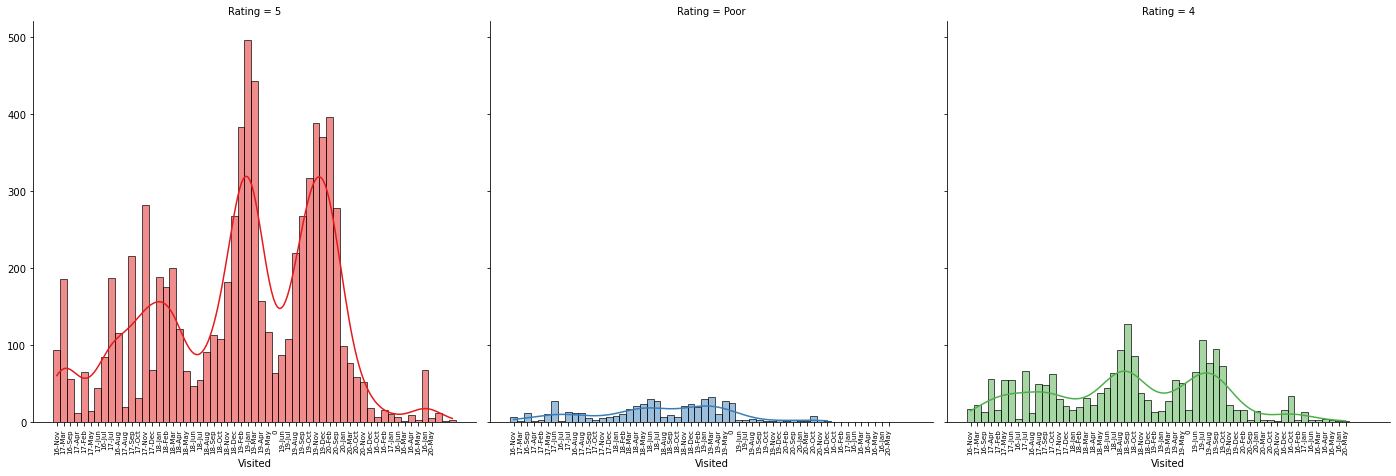

In [169]:
visited_grid = sns.FacetGrid(data=ta_5vspoor_df, col='Rating', hue="Rating", palette="Set1", height=6.5, aspect=1)
visited_grid.map(sns.histplot, "Visited", kde=True)
# plt.figure(figsize=(10,5))
# plt.plot(x, y)
visited_grid.set_xticklabels(rotation='vertical', fontsize=7)

- Poorer ratings increase during the 5 star ratings' off months

# Should I be using groupby here? Can we even do that with the lemmatizer?

In [174]:
# ta_5vspoor_date_group = ta_5vspoor.groupby('Visited')
# ta_5vspoor_date_group

In [ ]:
# ta_5vspoor_date_group

# bigram_5star = list(nltk.bigrams(tokens_5star))
# fdist_bi_5star = FreqDist(bigram_5star)
# fdist_bi_5star.most_common(50)

- Analyzing 5 star reviews on specific month and year

In [183]:
ta_5vspoor_date = ta_5vspoor[ta_5vspoor['Visited']=='19-Jan']

corpus_5star_date = ' '.join(ta_5vspoor_date[ta_5vspoor_date['Rating']==5]['Text']).lower()
tokens_5star_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star_date) if tokens not in stop_filters]

bigram_5star_date = list(nltk.bigrams(tokens_5star_date))
fdist_bi_5star_date = FreqDist(bigram_5star_date)
fdist_bi_5star_date.most_common(10)

[(('well', 'worth'), 8),
 (('ansel', 'adam'), 8),
 (('highly', 'recommend'), 6),
 (('tea', 'party'), 5),
 (('fenway', 'park'), 5),
 (('museum', 'fine'), 4),
 (('fine', 'art'), 4),
 (('historical', 'site'), 3),
 (('great', 'tour'), 3),
 (('tour', 'guide'), 3)]

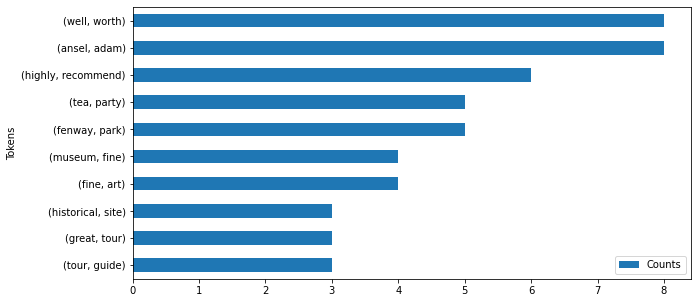

In [184]:
# Graph of 5 Star Bigram

fdist_bi_5star_date_graph = pd.DataFrame(fdist_bi_5star_date.most_common(10),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_date_graph.invert_yaxis()

In [193]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

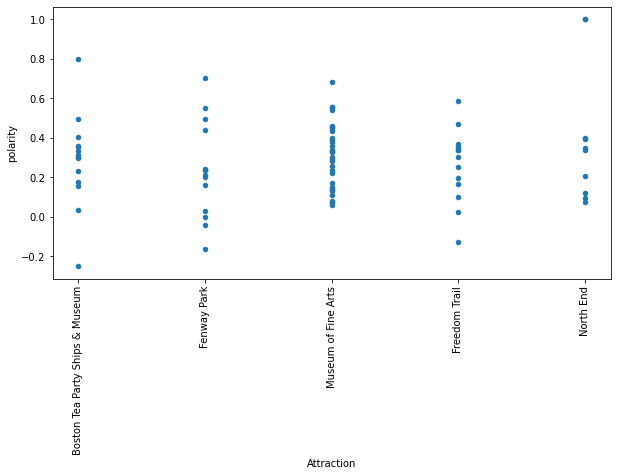

In [194]:
sample = ta_5vspoor_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- Analyzing all reviews on specific month and year

In [203]:
ta_date = ta_5vspoor[ta_5vspoor['Visited']=='19-Jan']

In [204]:
corpus_date = ' '.join(ta_date['Text']).lower()
tokens_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_date) if tokens not in stop_filters]

bigram_date = list(nltk.bigrams(tokens_date))
fdist_bi_date = FreqDist(bigram_date)
fdist_bi_date.most_common(20)

[(('ansel', 'adam'), 9),
 (('well', 'worth'), 8),
 (('highly', 'recommend'), 6),
 (('tea', 'party'), 6),
 (('paul', 'revere'), 5),
 (('freedom', 'trail'), 5),
 (('fenway', 'park'), 5),
 (('fine', 'art'), 5),
 (('much', 'see'), 4),
 (('see', 'everything'), 4),
 (('great', 'place'), 4),
 (('museum', 'fine'), 4),
 (('north', 'end'), 4),
 (('throw', 'tea'), 3),
 (('ship', 'museum'), 3),
 (('historical', 'site'), 3),
 (('fun', 'way'), 3),
 (('definitely', 'worth'), 3),
 (('take', 'tour'), 3),
 (('great', 'tour'), 3)]

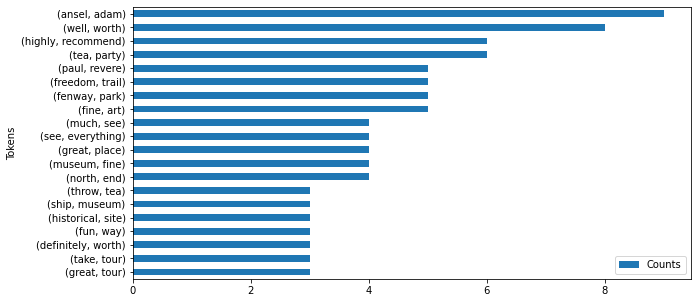

In [205]:
fdist_bi_date_graph = pd.DataFrame(fdist_bi_date.most_common(20),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_date_graph.invert_yaxis()

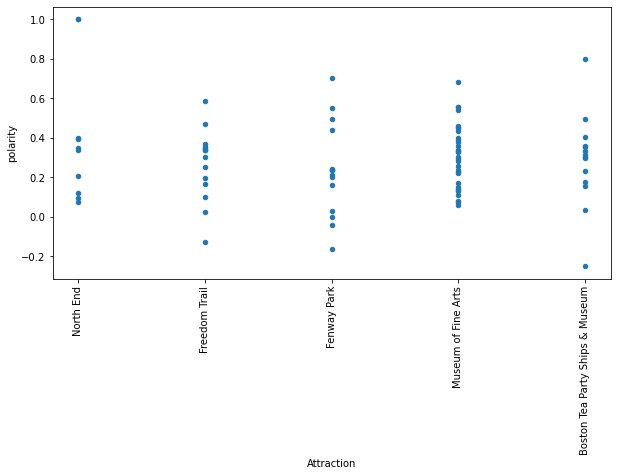

In [206]:
from textblob import TextBlob

sample_size = len(ta_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# User Location-Based Analysis

In [209]:
ta_5vspoor[['User_Loc1']].sample(50)

,User_Loc1
19723,Westerville
27713,Glenwood
22396,Waco
34493,Virginia
26233,
25865,San Antonio
25752,Douglasville
22581,Boston
23241,Waco
20463,Greater Palm Springs


In [192]:
ta_5vspoor[['User_Loc1']].sample(50)

83

Text(0, 0.5, 'Number of Reviews')

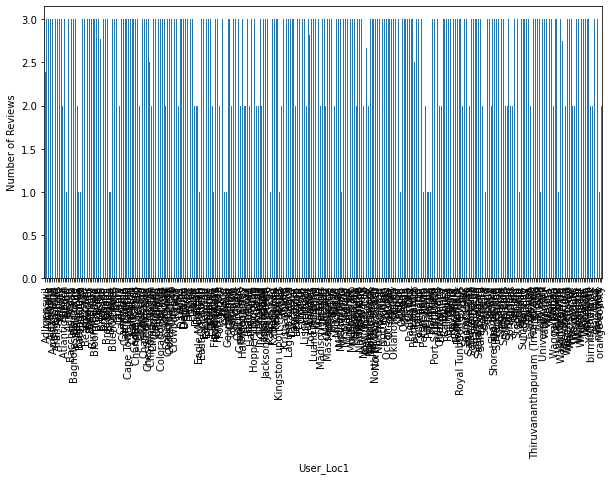

In [221]:
tripadv[(tripadv['City']=='Boston') & (tripadv['Rating']<4)].groupby('User_Loc1')['Rating'].mean().plot.bar()
plt.ylabel('Number of Reviews')